In [2]:
#logistic regression

In [4]:
#importing necessary library files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [6]:
#loading the data file
data=pd.read_csv("C:\\Users\\inspiron\\Documents\\ex2data1.txt",header=None)
x = data.iloc[:,0:2]
y = data.iloc[:,2]
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


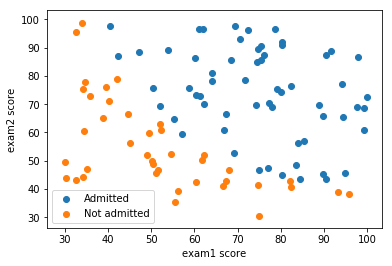

In [7]:
#plotting the given data

#masking (for plotting two different variables)

mask = y == 1 
adm = plt.scatter(x[mask][0].values, x[mask][1].values)
not_adm = plt.scatter(x[~mask][0].values, x[~mask][1].values)
plt.xlabel('exam1 score')
plt.ylabel('exam2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [8]:
#setting the parameters
m=len(y)
x = np.hstack((np.ones((m,1)), x))
y = y[:, np.newaxis]
theta = np.zeros((3,1))

In [9]:
#defining sigmoid function
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [12]:
#defining Cost Function
def costFunc(theta,x,y):
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(x @ theta))) + np.multiply((1-y), np.log(1 - sigmoid(x @ theta))))
    return J

In [21]:
#defining Gradient Descent function
def gradientDescent(theta,x,y):
    theta=((1/m) * x.T @ (sigmoid(x @ theta) - y))
    return theta

print(theta)

print("\n")

J=costFunc(theta,x,y)
print(J)

[[0.]
 [0.]
 [0.]]


0.6931471805599453


In [25]:
#Learning parameters using fmin_tnc

temp = opt.fmin_tnc(func = costFunc, 
                    x0 = theta.flatten(),fprime = gradientDescent, 
                    args = (x, y.flatten()))
theta_optimized = temp[0]
print(theta_optimized)

print("\n")

J = costFunc(theta_optimized[:,np.newaxis], x, y)
print(J)

[-25.16131862   0.20623159   0.20147149]


0.20349770158947464


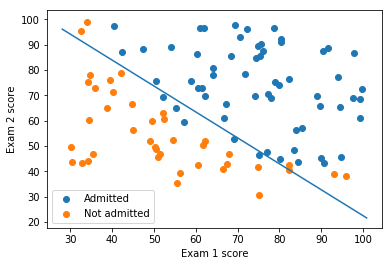

In [26]:
#Plotting Decision Boundary 

plot_x = [np.min(x[:,1]-2), np.max(x[:,2]+2)]
plot_y = -1/theta_optimized[2]*(theta_optimized[0]+np.dot(theta_optimized[1],plot_x))

adm = plt.scatter(x[mask][:,1], x[mask][:,2])
not_adm = plt.scatter(x[~mask][:,1], x[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [27]:
#determining accuracy

def accuracy(x,y,theta,cutoff):
    prediction=[sigmoid(x@theta) >=cutoff]
    acc=np.mean(prediction==y)
    print(acc*100)
    
accuracy(x, y.flatten(), theta_optimized,0.5)

89.0
